In [1]:
import sys
sys.path.append("/home/jupyter-hai/python-workspace/")

In [2]:
import biorithmfhrpython as femom
import pandas as pd
from scipy import signal
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [12]:
NFFT = 4096
step = 500

In [13]:
data = pd.read_csv("s3://biorithm-hai-data/nuh-ssa/1018ssa.csv")

In [14]:
data = data.values

In [15]:
x = data[:,1]

In [16]:
cep = femom.CepstrumAnalyser(NFFT=NFFT,step=step,windowFFT='tukey')

In [17]:
y = cep.computeCepstrum(x)

<IPython.core.display.Javascript object>


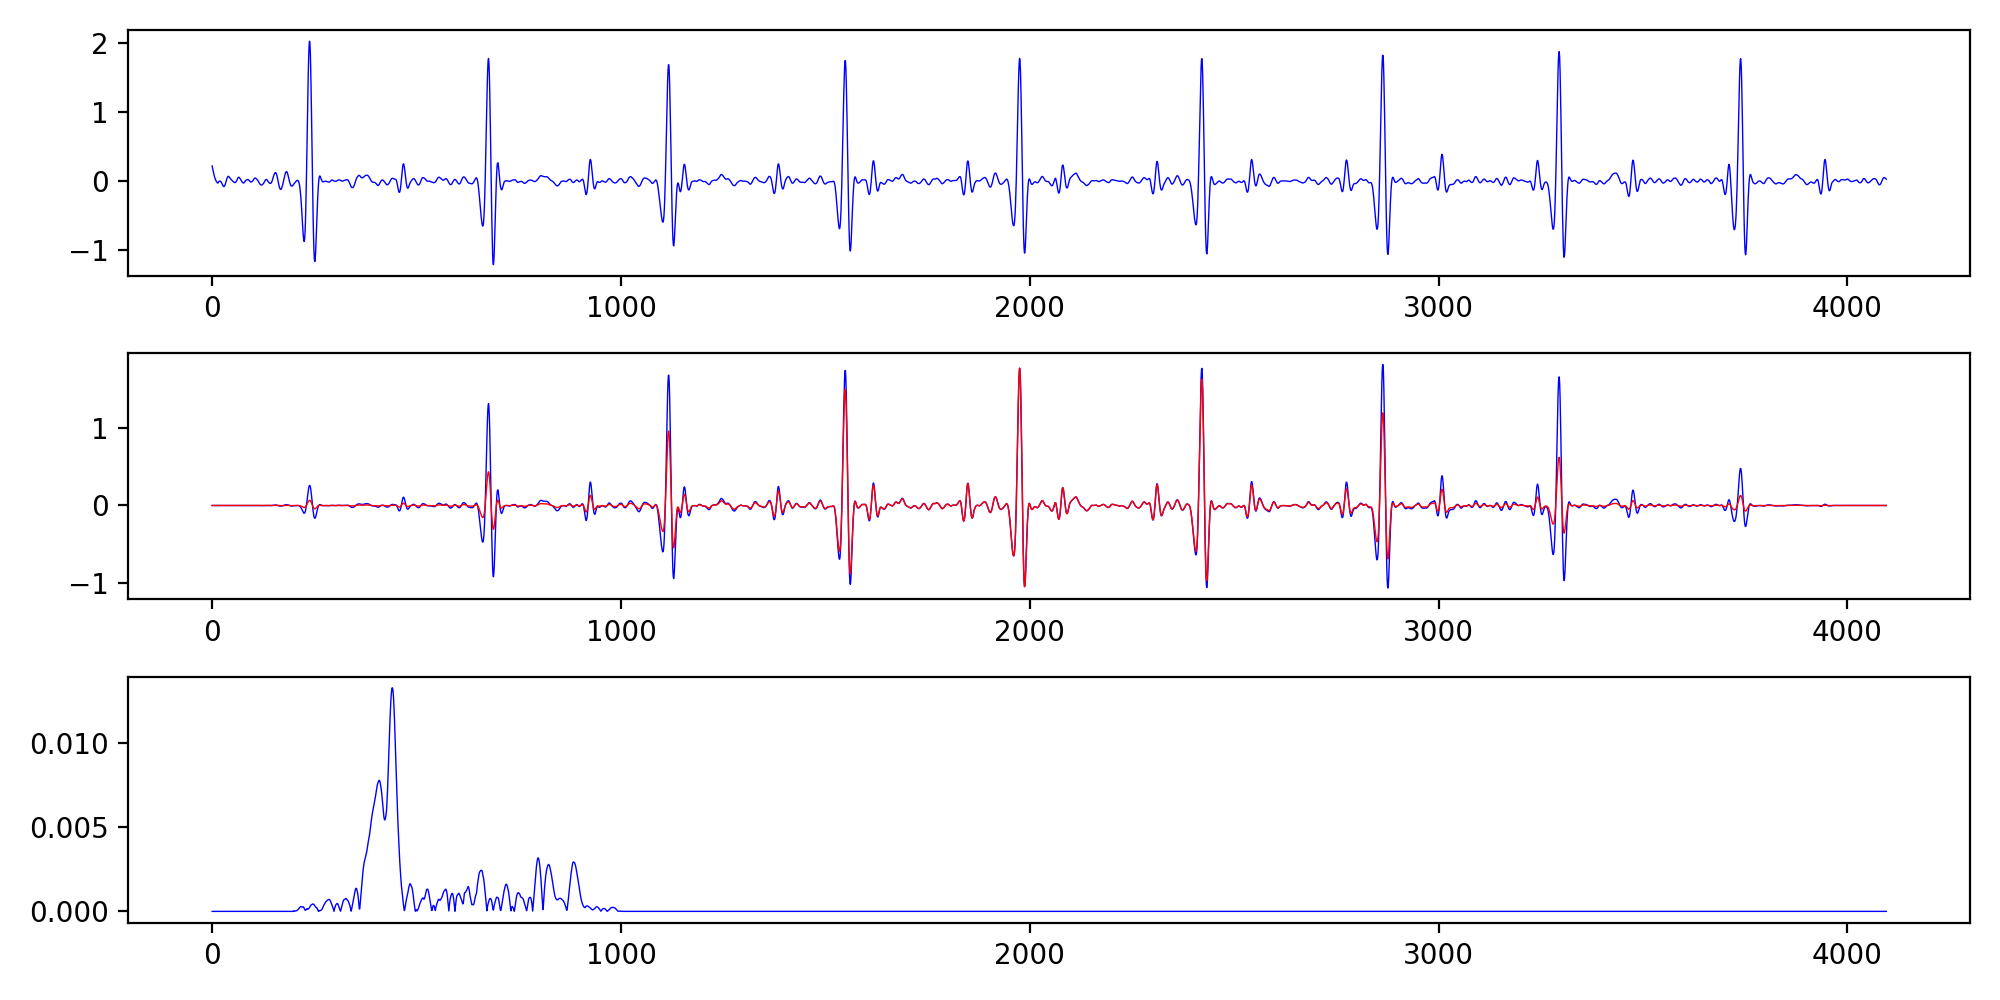

In [18]:
idx = 160
lag = 50
fig,axes = plt.subplots(3,1,figsize=(10,5))
axes[0].plot(x[idx*NFFT:(idx+1)*NFFT],'b',linewidth=0.5)
axes[1].plot(signal.windows.tukey(NFFT) * x[idx*NFFT:(idx+1)*NFFT],'b',linewidth=0.5)
axes[1].plot(signal.windows.hann(NFFT) * x[idx*NFFT:(idx+1)*NFFT],'r',linewidth=0.5)
axes[2].plot(y[:,idx],'b',linewidth=0.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


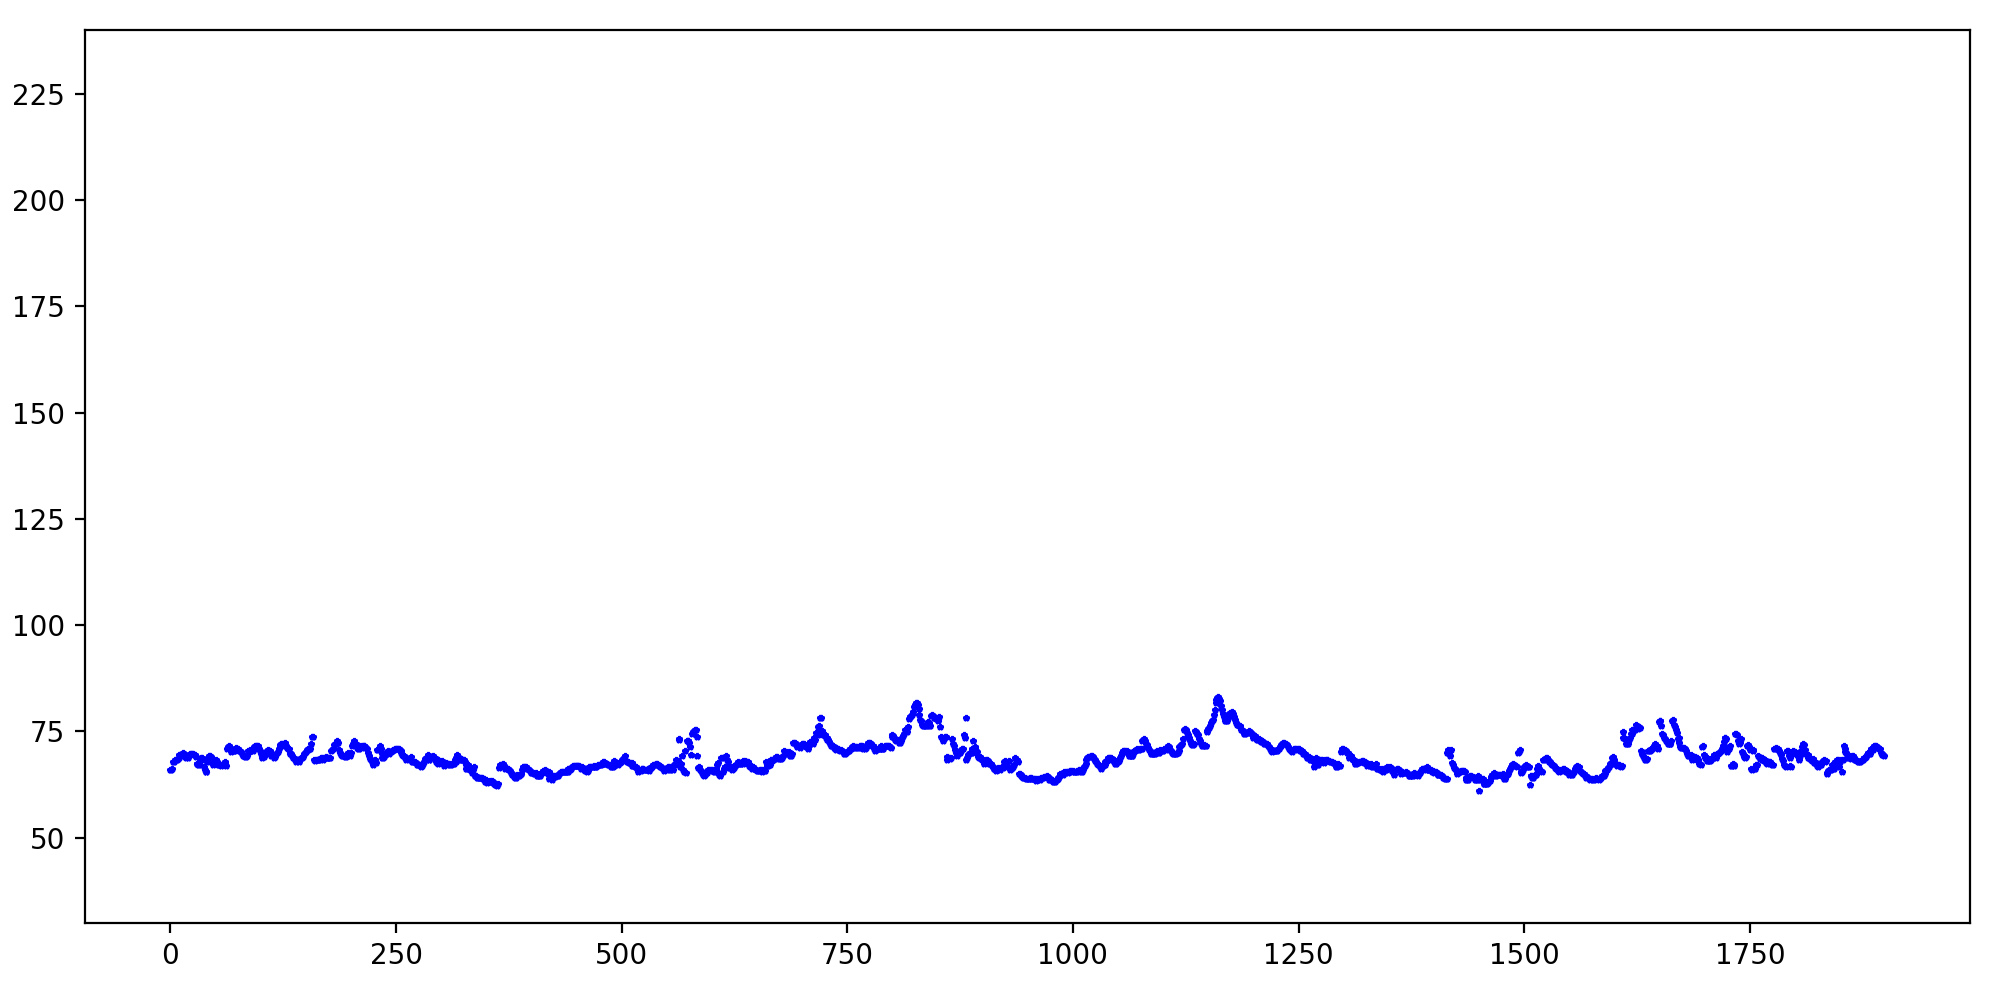

(30.0, 240.0)

In [19]:
fig = plt.figure(figsize=(10,5))
plt.plot(cep.heartrate,'b*',markersize=2)
plt.tight_layout()
plt.ylim(30,240)